# Visualizing Bezier Analysis (`.ipynb`)

## Coarse fit

### Import necessary libraries

In [1]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from src.pickpoints import *
from src.bezierfit import *

### Set the paramters

In [2]:
filename_2Daverage = './db/templates_selected_bezierfit.mrc'
section = 16
initial_data_points_num = 500

### Generate the data points

In [3]:
with mrcfile.open(filename_2Daverage) as f:
        image = f.data[section]
max_filtered_image = max_filter(image)
# 生成数据点
data_points = generate_data_points(image, initial_data_points_num)

Show the original image, max-filteed image, and the data points

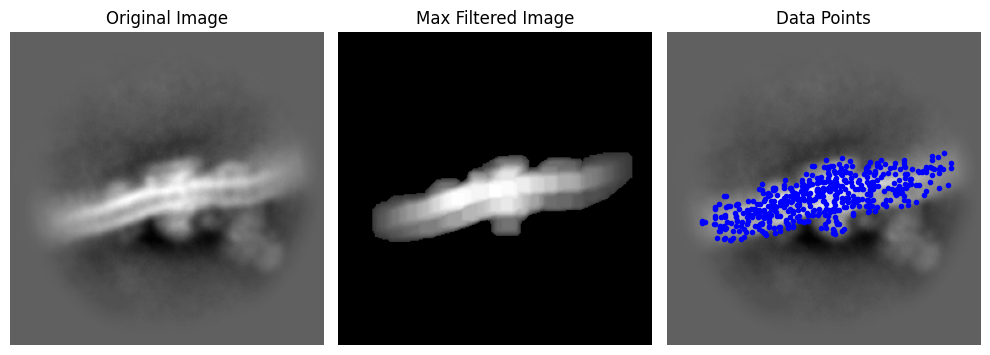

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', origin='lower')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(max_filtered_image, cmap='gray', origin='lower')
plt.title('Max Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray', origin='lower')
plt.title('Data Points')
plt.axis('off')
plt.plot(data_points[:, 0], data_points[:, 1], 'b.')

plt.tight_layout()
plt.show()

### Coarse fit: generate intial control points

In [5]:
bezier_degree = 3
coarse_iteration = 700

In [6]:
coarsefit = Coarsefit(image=image, num_points=initial_data_points_num, degree=bezier_degree, iteration=coarse_iteration)
initial_control_points = coarsefit()
print('Initial Control Points:', initial_control_points)

gen	nevals	avg        	std        	min        	max        
0  	100   	1.93298e+07	7.45036e+06	3.93846e+06	3.83652e+07
1  	77    	1.10273e+07	4.44083e+06	3.38866e+06	2.60016e+07
2  	67    	6.60018e+06	2.38678e+06	2.6819e+06 	1.65696e+07
3  	73    	4.40417e+06	1.62709e+06	1.53115e+06	1.0306e+07 
4  	67    	2.97223e+06	940933     	1.31142e+06	7.97569e+06
5  	71    	2.13214e+06	530194     	1.17533e+06	3.58231e+06
6  	80    	1.63262e+06	480155     	855839     	3.43829e+06
7  	77    	1.22557e+06	270201     	557494     	2.1998e+06 
8  	71    	955983     	213393     	447932     	1.68143e+06
9  	63    	770947     	184040     	411039     	1.37217e+06
10 	66    	608170     	164867     	363731     	1.63209e+06
11 	76    	471268     	84517.5    	335800     	875004     
12 	75    	402217     	65320.7    	282429     	764520     
13 	72    	364355     	64332.5    	249205     	593900     
14 	78    	307629     	40947      	249374     	473903     
15 	77    	274175     	39973.4    	241838     	568967   

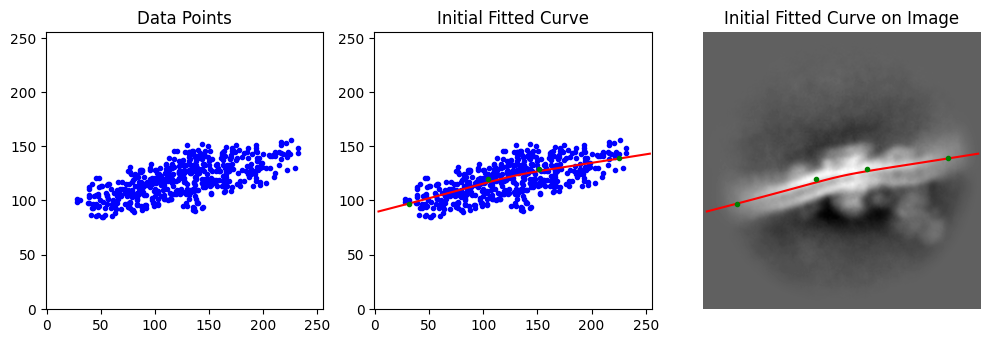

In [7]:
initial_fitted_curve_points, initial_t_values = generate_curve_within_boundaries(initial_control_points, image.shape, 0.01)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(data_points[:, 0], data_points[:, 1], 'b.')
plt.title('Data Points')
plt.imshow(image, cmap='gray', alpha=0, origin='lower')


plt.subplot(1, 3, 2)
plt.plot(data_points[:, 0], data_points[:, 1], 'b.')
plt.plot(initial_fitted_curve_points[:, 0], initial_fitted_curve_points[:, 1], 'r-')
plt.plot(initial_control_points[:, 0], initial_control_points[:, 1], 'g.')
plt.title('Initial Fitted Curve')
plt.imshow(image, cmap='gray', alpha=0, origin='lower')


plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray', origin='lower')
plt.plot(initial_fitted_curve_points[:, 0], initial_fitted_curve_points[:, 1], 'r-')
plt.plot(initial_control_points[:, 0], initial_control_points[:, 1], 'g.')
plt.title('Initial Fitted Curve on Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## GA Refinement
### Set the parameters

In [8]:
pixel_size = 2.170
penalty_threshold = 0.05
dither_range = 70
iterations = 700

In [9]:
ga_refine = GA_Refine(image, pixel_size=pixel_size, penalty_threshold=penalty_threshold, dithering_range=dither_range, iterations=iterations)
refined_control_points = ga_refine(initial_control_points, image)
refined_control_points = np.array(refined_control_points)
print(f'Control points: {refined_control_points}')

/Users/zhenhuang/opt/anaconda3/envs/cryoem/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg         	std        	min         	max    
0  	31    	-2.19361e+11	6.37697e+11	-3.19596e+12	2268.36
1  	20    	1807.92     	553.378    	666.08      	2268.36
2  	26    	2253.73     	21.2737    	2196.9      	2285.43
3  	26    	2271.17     	14.0597    	2230.47     	2303.17
4  	22    	2286.59     	21.6743    	2227.5      	2327.79
5  	26    	2311.58     	17.6472    	2247.04     	2330.3 
6  	22    	2326.56     	2.99077    	2316.32     	2330.36
7  	28    	2328.49     	2.05926    	2321.55     	2331.87
8  	28    	2330.2      	2.04154    	2322.19     	2333.5 
9  	26    	2330.65     	2.82643    	2320.42     	2333.5 
10 	21    	2332.66     	1.96151    	2327.78     	2339.26
11 	22    	2334.27     	2.51638    	2326.51     	2340.58
12 	23    	2336.4      	3.57707    	2326.09     	2340.58
13 	24    	2338.03     	3.76101    	2325.24     	2341.43
14 	22    	2339.96     	2.04535    	2331.77     	2341.43
15 	22    	2340.57     	1.30779    	2336.45     	2341.62
16 	25    	2340.98     	1.22573

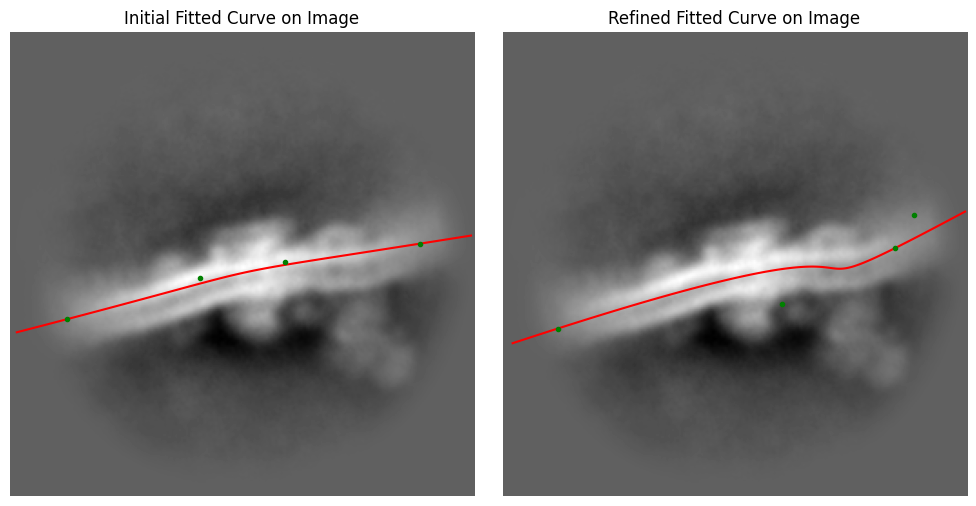

In [10]:
fitted_curve_points, t_values = generate_curve_within_boundaries(refined_control_points, image.shape, 0.01)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', origin='lower')
plt.plot(initial_fitted_curve_points[:, 0], initial_fitted_curve_points[:, 1], 'r-')
plt.plot(initial_control_points[:, 0], initial_control_points[:, 1], 'g.')
plt.title('Initial Fitted Curve on Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray', origin='lower')
plt.plot(fitted_curve_points[:, 0], fitted_curve_points[:, 1], 'r-')
plt.plot(refined_control_points[:, 0], refined_control_points[:, 1], 'g.')
plt.title('Refined Fitted Curve on Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Membrane Average

In [11]:
membrane_averaging = MemAverage(image=image, control_points=refined_control_points, pixel_size=2.170)
membrane_mask, averaged_2d = membrane_averaging.mem_average()

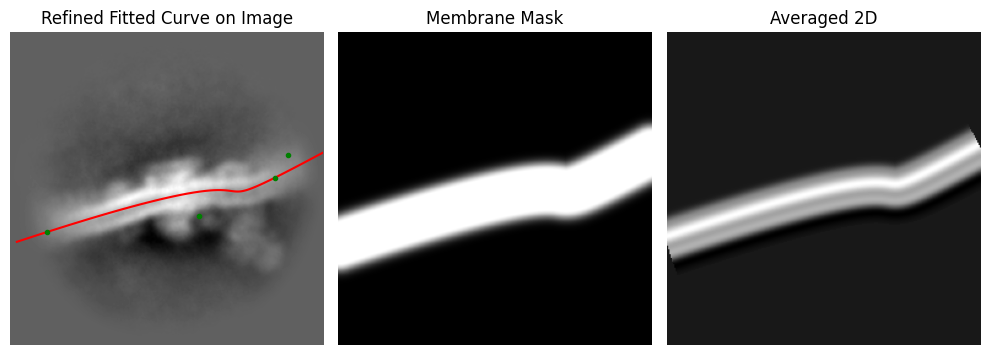

In [12]:
fitted_curve_points, t_values = generate_curve_within_boundaries(refined_control_points, image.shape, 0.01)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', origin='lower')
plt.plot(fitted_curve_points[:, 0], fitted_curve_points[:, 1], 'r-')
plt.plot(refined_control_points[:, 0], refined_control_points[:, 1], 'g.')
plt.title('Refined Fitted Curve on Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(membrane_mask, cmap='gray', origin='lower')
plt.title('Membrane Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(averaged_2d*membrane_mask, cmap='gray', origin='lower')
plt.title('Averaged 2D')
plt.axis('off')


plt.tight_layout()
plt.show()